## **Nama Kelompok:**
1. Akmal Muzakki Bakir (1305210087)
2. Namira Salsabilla (1305210091)

## Persiapan Modul

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from collections import deque

## Deskripsi Pengumpulan Data

**Penjelasan Atribut**:
1. created_at: Atribut ini menunjukkan tanggal dan waktu ketika tweet dibuat, dalam format UTC (Universal Time Coordinated).
2. id_str: Atribut ini menunjukkan ID unik dari tweet, dalam bentuk string.
3. full_text: Atribut ini menunjukkan teks lengkap dari tweet, termasuk hashtag, mention, dan emoji.
4. quote_count: Atribut ini menunjukkan jumlah tweet yang mengutip tweet ini, dalam bentuk angka.
5. reply_count: Atribut ini menunjukkan jumlah balasan yang diterima tweet ini, dalam bentuk angka.
6. retweet_count: Atribut ini menunjukkan jumlah retweet yang dilakukan oleh pengguna lain terhadap tweet ini, dalam bentuk angka.
7. favorite_count: Atribut ini menunjukkan jumlah favorit atau suka yang diberikan oleh pengguna lain terhadap tweet ini, dalam bentuk angka.
8. lang: Atribut ini menunjukkan kode bahasa yang digunakan dalam tweet, sesuai dengan standar ISO 639-1.
9. user_id_str: Atribut ini menunjukkan ID unik dari pengguna yang membuat tweet, dalam bentuk string.
10. conversation_id_str: Atribut ini menunjukkan ID unik dari percakapan yang terkait dengan tweet, dalam bentuk string. Jika tweet merupakan tweet awal dari percakapan, maka atribut ini akan sama dengan id_str. Jika tweet merupakan balasan atau kutipan dari tweet lain, maka atribut ini akan mengacu pada id_str dari tweet awal.
11. username: Atribut ini menunjukkan nama pengguna atau handle dari pengguna yang membuat tweet, dalam bentuk string.
12. tweet_url: Atribut ini menunjukkan URL atau tautan dari tweet, dalam bentuk string. URL ini dapat digunakan untuk mengakses tweet secara langsung di situs web atau aplikasi Twitter.

**Kriteria Scrapping:**
1. Pencarian dilakukan berdasarkan hashtag
2. Pencarian dilakukan dengan format tanggal 29 Oktober 2023
3. Pencarian dilakukan dengan jumlah kurang lebih 5000 tweet

Untuk melakukan scrapping dataset, kami menggunakan tweet harvest, sebuah modul node.js yang dapat mengambil data twitter sesuai dengan parameter yang ditentukan. Kami menjalankan kode ini di terminal untuk scrapping (setelah menginstall node.js):
- `npx --yes tweet-harvest@latest -o "DATASET.csv/xlsx" -l LIMIT -s "YOUR_KEYWORD" --token "YOUR_AUTH_TOKEN"`

Kami melakukan scrapping dengan keyword hashtag #FreePalestine, dengan jumlah tweet 5000, dan dengan format tanggal 29 Oktober 2023. Hasil scrapping kami simpan dalam file csv dengan nama FreePalestine.csv. Berikut adalah kode yang kami gunakan untuk melakukan scrapping:
- `npx --yes tweet-harvest@latest -o "FreePalestine.csv" -l 5000 -s "(#FreePalestine) until:2023-10-29 since:2023-10-30" --token "MY_AUTH_TOKEN"`

**Dataset:**
- Dataset hasil scrapping yang kami lakukan dapat dilihat atau diunduh [disini](https://telkomuniversityofficial-my.sharepoint.com/:x:/g/personal/namira_student_telkomuniversity_ac_id/EdgWD0PyWgBMmQpLsWSUvuQBsfRDIOOj23MVOBDEiiFBjg?e=NNg4CU)

## Persiapan Data

In [2]:
dataset = pd.read_csv('tweets-data/FreePalestine.csv', delimiter=';')
dataset.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sun Oct 29 14:12:51 +0000 2023,1718631988389896214,@ZeenatActivist #FreePalestine,0,0,0,0,qme,1282313206250319872,1718604132456771990,AmnaLucci,https://twitter.com/AmnaLucci/status/171863198...
1,Sun Oct 29 14:12:50 +0000 2023,1718631986401792443,@AndyPark23 IT'S A HUMANITARIAN DUTY #StopGen...,0,0,0,0,en,1326193695608037377,1718631459811111187,strwowss,https://twitter.com/strwowss/status/1718631986...
2,Sun Oct 29 14:12:50 +0000 2023,1718631985323864276,@rahmdess27 ITS A HUMANITARIAN DUTY FREE PALE...,0,0,0,0,en,1688502539497656320,1718620119457529930,grumpyata,https://twitter.com/grumpyata/status/171863198...
3,Sun Oct 29 14:12:50 +0000 2023,1718631984740565078,@dailyofkei ITS A HUMANITARIAN DUTY FREE PALES...,0,0,0,0,en,1543409564745433088,1718617531039244306,forchyj,https://twitter.com/forchyj/status/17186319847...
4,Sun Oct 29 14:12:50 +0000 2023,1718631984292069573,@milkberrycf IT'S A HUMANITARIAN DUTY FREE PAL...,0,0,0,0,en,1507680804952227840,1718628997763051954,y2kchannn,https://twitter.com/y2kchannn/status/171863198...


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   created_at           5042 non-null   object
 1   id_str               5042 non-null   int64 
 2   full_text            5042 non-null   object
 3   quote_count          5042 non-null   int64 
 4   reply_count          5042 non-null   int64 
 5   retweet_count        5042 non-null   int64 
 6   favorite_count       5042 non-null   int64 
 7   lang                 5042 non-null   object
 8   user_id_str          5042 non-null   int64 
 9   conversation_id_str  5042 non-null   int64 
 10  username             5042 non-null   object
 11  tweet_url            5042 non-null   object
dtypes: int64(7), object(5)
memory usage: 472.8+ KB


Data yang di ambil adalah data pada tanggal 29 Oktober 2023 dengan jumlah tweet sebanyak kurang lebih 5000 tweet.

In [4]:
dataset['created_at'] = pd.to_datetime(dataset['created_at'])
dataset['created_at'].dt.date.unique()

array([datetime.date(2023, 10, 29)], dtype=object)

Selanjutnya menurunkan atribut "total_interaction" yang dihitung sebagai hasil penjumlahan dari empat atribut lainnya, yaitu "retweet_count", "favorite_count", "quote_count", dan "reply_count". Ini digunakan untuk mencerminkan sejauh mana suatu tweet memiliki dampak atau interaksi dengan pengguna lain dalam konteks media sosial seperti Twitter.

In [5]:
dataset['total_interaction'] = dataset['retweet_count'] + dataset['favorite_count'] + dataset['quote_count'] + dataset['reply_count']
dataset.sort_values(by='total_interaction', ascending=False, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 3217 to 2521
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   created_at           5042 non-null   datetime64[ns, UTC]
 1   id_str               5042 non-null   int64              
 2   full_text            5042 non-null   object             
 3   quote_count          5042 non-null   int64              
 4   reply_count          5042 non-null   int64              
 5   retweet_count        5042 non-null   int64              
 6   favorite_count       5042 non-null   int64              
 7   lang                 5042 non-null   object             
 8   user_id_str          5042 non-null   int64              
 9   conversation_id_str  5042 non-null   int64              
 10  username             5042 non-null   object             
 11  tweet_url            5042 non-null   object             
 12  total_interaction

## Analisis Data

In [6]:
print("Unique tweets: {}".format(len(dataset['full_text'].unique())))
print("All tweets: {}".format(len(dataset['full_text'])))

Unique tweets: 3966
All tweets: 5042


Output diatas menunjukkan tweet yang unik ada sebanyak 3966 dari total 5042 tweets, yang artinya, kemungkinan sisanya adalah retweet atau tweet yang sama yang diunggah oleh user lain.

In [7]:
retweets = []
actual_tweets = []
for i in zip(dataset['username'], dataset['full_text'], dataset['total_interaction']):
    if re.search(r'^\bRT\b', i[1]) == None:
        actual_tweets.append([i[0], i[1], i[2]])
    else:
        retweets.append([i[0], i[1], i[2]])

actual_tweets = np.array(actual_tweets)
retweets = np.array(retweets)

print("Unique tweets: {}".format(len(actual_tweets)))
print("Retweets: {}".format(len(retweets)))

Unique tweets: 5022
Retweets: 20


Terlihat bahwa terdapat 20 tweet yang mengandung kata RT (ini bisa jadi user yang melakukan retweet dari user lain atau ada text dengan awalan RT dari tweet yang di unggah oleh user).

In [8]:
# Mengoutputkan semua tweet yang mengandung kata 'RT' di depannya
for i in retweets:
    print(i[1])

RT AND REPLY!   ITS A HUMANITARIAN DUTY  FREE PALESTINE 🇵🇸 no internet communication, no food, no safe place to live  #StopGenocideInGaza  #CeaseFireInGaza  #CeaseFireNOW #FreePalestine https://t.co/FhuGckF9kc
RT AND REPLY-!!   ITS A HUMANITARIAN DUTY  FREE PALESTINE 🇵🇸 no internet communication, no food, no safe place to live  #StopGenocideInGaza  #CeaseFireInGaza  #CeaseFireNOW #FreePalestine https://t.co/UmR4ZB91NE
RT AND REPLY ‼️  ITS A HUMANITARIAN DUTY  FREE PALESTINE 🇵🇸 no internet communication, no food, no safe place to live  #StopGenocideInGaza  #CeaseFireInGaza  #CeaseFireNOW #FreePalestine https://t.co/RRyzzQ0KcU
RT AND REPLY   ITS A HUMANITARIAN DUTY  FREE PALESTINE 🇵🇸 no internet communication, no food, no safe place to live  #StopGenocideInGaza  #CeaseFireInGaza  #CeaseFireNOW #FreePalestine https://t.co/MbjSesREiy
RT &amp  REPLY PLEASE !!!  ITS A HUMANITARIAN DUTY  FREE PALESTINE 🇵🇸 no internet communication, no food, no safe place to live  #StopGenocideInGaza  #CeaseFi

Dan ternyata, semua tweet diatas adalah tweet dari user (bukan hasil dari retweet). Artinya, modul scrapping dari tweet-harvest langsung mengoutputkan tweet original (bukan hasil dari retweet)

In [9]:
# Penggabungan kembali Actual Tweets dan Retweets
original_tweets = np.concatenate((actual_tweets, retweets), axis=0)
original_tweets = pd.DataFrame(original_tweets, columns=['username', 'full_text', 'total_interaction'])
original_tweets['total_interaction'] = original_tweets['total_interaction'].astype(np.int64)
original_tweets.sort_values(by='total_interaction', ascending=False, inplace=True)
original_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5042 entries, 0 to 5041
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   username           5042 non-null   object
 1   full_text          5042 non-null   object
 2   total_interaction  5042 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 157.6+ KB


In [10]:
original_tweets['total_interaction'].sort_values(ascending=False).unique()

array([2257, 1879, 1735, 1152, 1059, 1044, 1011, 1002,  939,  928,  904,
        903,  775,  746,  606,  591,  523,  515,  510,  489,  322,  295,
        287,  271,  261,  259,  242,  229,  211,  200,  196,  195,  193,
        192,  182,  175,  173,  165,  160,  157,  135,  130,  126,  121,
        116,  115,  113,  111,  110,  106,  104,  101,   96,   95,   93,
         92,   91,   89,   87,   85,   84,   82,   79,   76,   74,   73,
         72,   71,   70,   68,   67,   66,   65,   64,   63,   62,   59,
         58,   55,   54,   52,   51,   49,   48,   44,   43,   42,   40,
         39,   38,   37,   36,   35,   34,   33,   30,   29,   28,   27,
         26,   25,   24,   22,   21,   20,   19,   18,   17,   16,   15,
         14,   13,   12,   11,   10,    9,    8,    7,    6,    5,    4,
          3,    2,    1,    0], dtype=int64)

Selanjutnya, akan di buat kode untuk mencari dan mengelompokkan user yang di sebutkan dalam teks tweet, berdasarkan apakah mereka termasuk dalam dataset username atau tidak.
- **in_set:** Hubungan yang disebutkan dalam tweet dan ada dalam dataset username, yang berarti pengguna yang disebutkan adalah pengguna yang ada dalam dataset.

In [11]:
in_set = []

for user in original_tweets.values:
    mentioned = re.findall(r'@\w*', user[1])
    if mentioned != []:
        for user_mentioned in mentioned:
            if (user_mentioned[1:] in dataset['username'].unique()) and (user[0] != user_mentioned[1:]):
                in_set.append([user[0], user_mentioned[1:], user[2]])

print(len(in_set))

685


In [12]:
inset = pd.DataFrame(in_set, columns=['user', 'mentioned', 'total_interaction'])
inset['total_interaction'] = inset['total_interaction'].astype(np.int64)
inset.sort_values(by='total_interaction', ascending=False, inplace=True)
inset.head()

,user,mentioned,total_interaction
0,cakepr,kalewrittings,15
1,cakepr,antajriksa,15
2,timeto_reve,aiiswjy,14
3,timeto_reve,barbar_rene,14
4,timeto_reve,bocimrv,14


In [13]:
# Explode kolom mention
inset = inset.explode('mentioned').reset_index(drop=True)
inset.head()

,user,mentioned,total_interaction
0,cakepr,kalewrittings,15
1,cakepr,antajriksa,15
2,timeto_reve,aiiswjy,14
3,timeto_reve,barbar_rene,14
4,timeto_reve,bocimrv,14


In [14]:
# Meengoutputkan nilai max dan min dari total_interaction
max_total_interaction = max(inset['total_interaction'])
min_total_interaction = min(inset['total_interaction'])

print("Max total_interaction: {}".format(max_total_interaction))
print("Min total_interaction: {}".format(min_total_interaction))

Max total_interaction: 15
Min total_interaction: 0


Selanjutnya, akan di cek mengenai panjang karakter dari user dan mention. Hal ini ditujukan untuk mengubah sisa dari 3 nama terdepan menjadi *** (mengenai privasi)

In [15]:
# Ketika menemukan user dan mention dengan panjang <= 3, maka akan ditambahkan huruf * di belakangnya
inset['user'] = inset['user'].apply(lambda x: x+'*' if len(x) <= 3 else x)
inset['mentioned'] = inset['mentioned'].apply(lambda x: x+'*' if len(x) <= 3 else x)

print(inset[inset['user'].str.len() <= 3])
print(inset[inset['mentioned'].str.len() <= 3])

Empty DataFrame
Columns: [user, mentioned, total_interaction]
Index: []
Empty DataFrame
Columns: [user, mentioned, total_interaction]
Index: []


In [16]:
# Menghapus @ pada kolom mention
inset['mentioned'] = inset['mentioned'].apply(lambda x: x[1:])
inset.head()

,user,mentioned,total_interaction
0,cakepr,alewrittings,15
1,cakepr,ntajriksa,15
2,timeto_reve,iiswjy,14
3,timeto_reve,arbar_rene,14
4,timeto_reve,ocimrv,14


In [17]:
# Mengubah sisa dari 3 nama terdepan kolom 'user' dan 'mentioned' menjadi * di kali (banyaknya huruf)
inset['user'] = inset['user'].apply(lambda x: x[:3] + '*' * (len(x) - 3))
inset['mentioned'] = inset['mentioned'].apply(lambda x: x[:3] + '*' * (len(x) - 3))
inset.head()

,user,mentioned,total_interaction
0,cak***,ale*********,15
1,cak***,nta******,15
2,tim********,iis***,14
3,tim********,arb*******,14
4,tim********,oci***,14


In [18]:
# Mengambil 5 teratas berdasarkan value_counts dari kolom 'user' dan 'mention'
print(inset['user'].value_counts()[:5])
print()
print(inset['mentioned'].value_counts()[:5])

aeg*********     19
jay******        19
bkn**********    15
mwr******        15
Rii**********    14
Name: user, dtype: int64

est*****     105
oyj******     24
ell*****      21
h_4****       19
uvs*****      17
Name: mentioned, dtype: int64


## Visualisasi Data

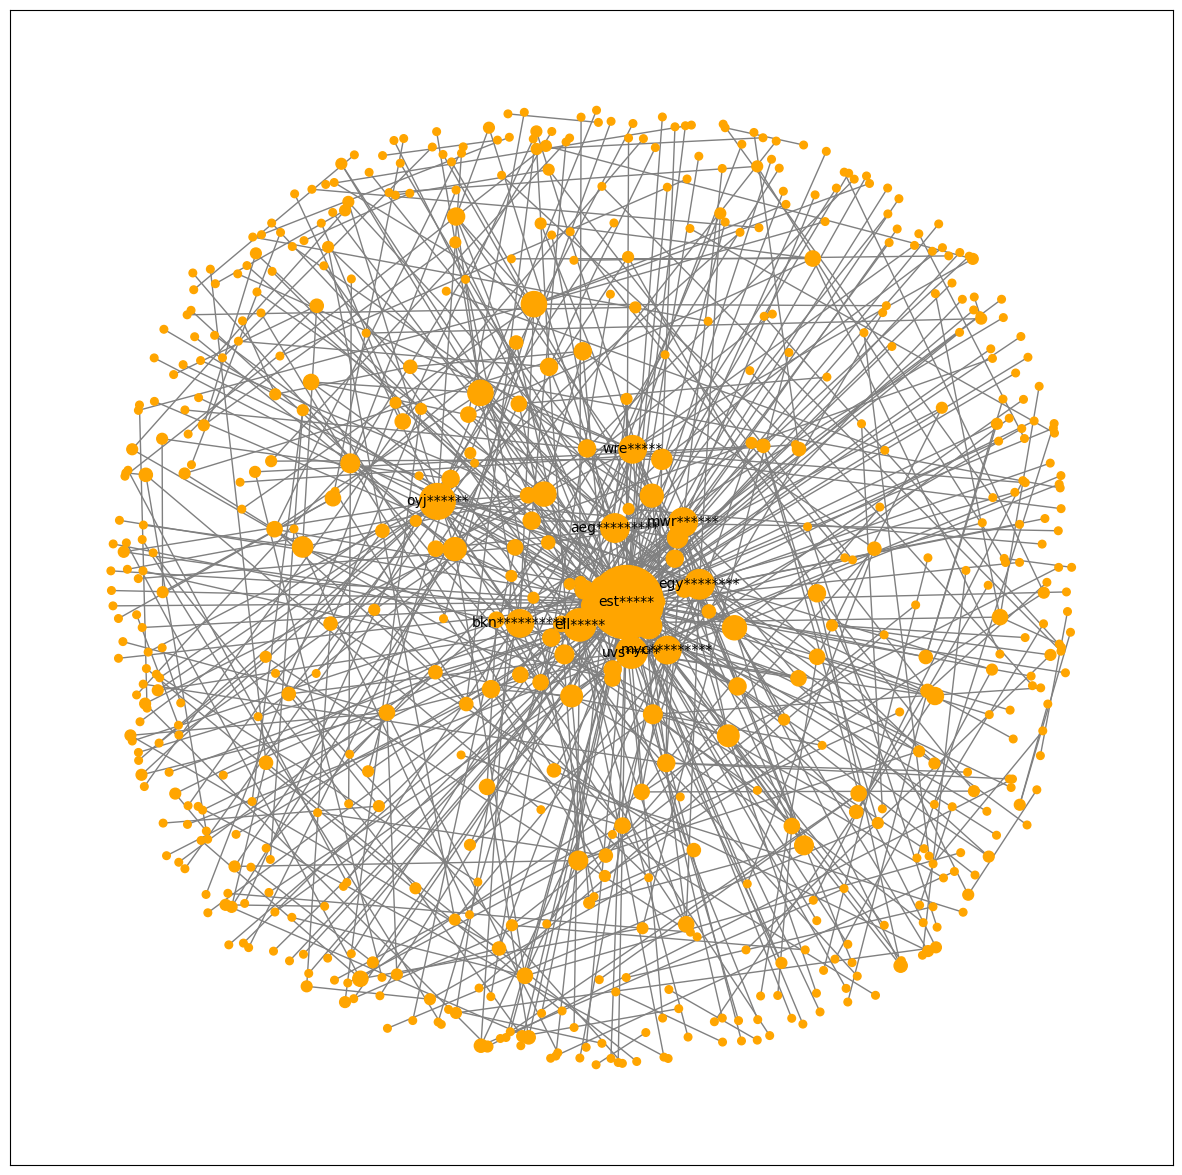

In [19]:
# Membuat visualisasi graph menggunakan metode fruchterman reingold
G = nx.from_pandas_edgelist(inset, source='user', target='mentioned', create_using=nx.Graph())

degree_centrality = dict(G.degree())
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

plt.figure(figsize=(15, 15))
pos = nx.fruchterman_reingold_layout(G, k=0.5, iterations=50)
nx.draw_networkx(G,
                 with_labels=True,
                 labels={node: node if node in top_nodes else "" for node in G.nodes()},
                 node_color='orange',
                 edge_color='grey',
                 linewidths=1,
                 font_size=10,
                 node_size=[v * 30 for v in dict(G.degree()).values()],
                 pos=pos
                 )
plt.show()

Gambar diatas merupakan hasil visualisasi graph menggunakan metode fruchterman reingold. Metode Fruchterman-Reingold adalah salah satu algoritma yang digunakan untuk visualisasi graf. Algoritma ini menggambar graf dengan menggunakan gaya tarik dan tolak antara simpul-simpul yang terhubung atau tidak terhubung. Algoritma ini bertujuan untuk membuat graf menjadi lebih rapi, simetris, dan mudah dibaca.

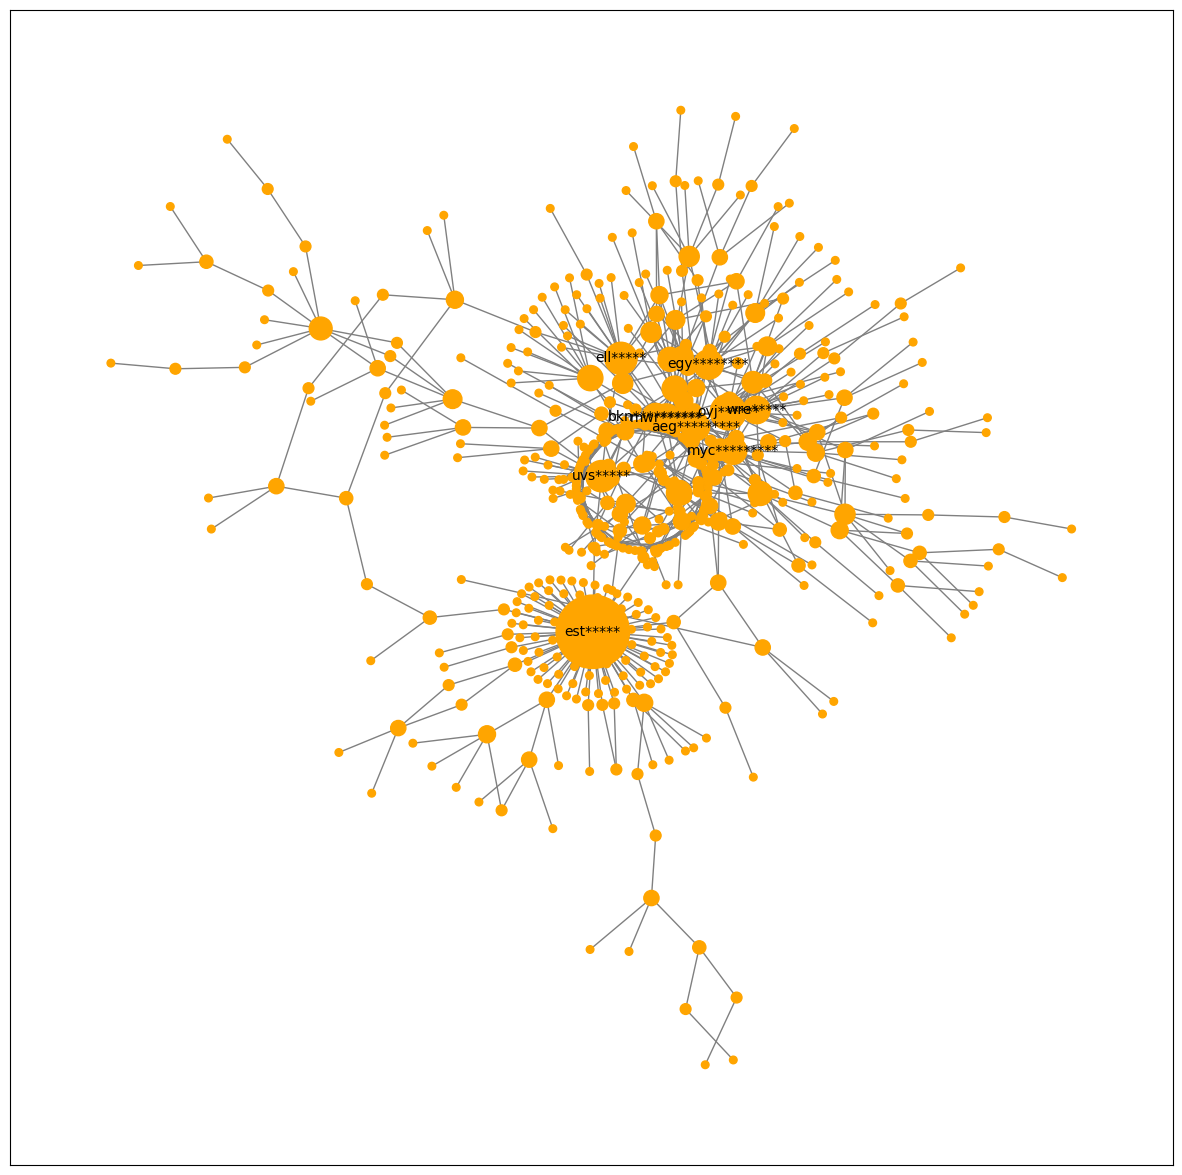

In [20]:
# Membuat visualisasi graph menggunakan metode Kamada Kawai
G = nx.from_pandas_edgelist(inset, source='user', target='mentioned', create_using=nx.Graph())

degree_centrality = dict(G.degree())
top_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:10]

plt.figure(figsize=(15, 15))
pos = nx.kamada_kawai_layout(G, scale=2)
nx.draw_networkx(G,
                 with_labels=True,
                 labels={node: node if node in top_nodes else "" for node in G.nodes()},
                 node_color='orange',
                 edge_color='grey',
                 linewidths=1,
                 font_size=10,
                 node_size=[v * 30 for v in dict(G.degree()).values()],
                 pos=pos
                 )
plt.show()


Gambar diatas merupakan hasil visualisasi graph menggunakan metode kamada kawai. Metode Kamada Kawai adalah salah satu metode yang digunakan untuk visualisasi graf dengan menggunakan konsep gaya tarik dan tolak antara simpul-simpul yang terhubung atau tidak terhubung. Metode ini bertujuan untuk mencari posisi simpul-simpul yang meminimalkan fungsi energi yang ditentukan oleh jarak antara simpul-simpul dan panjang ideal dari sisi-sisi. Metode ini dapat menghasilkan visualisasi graf yang rapi, simetris, dan mudah dibaca.

In [21]:
# Menampilkan jumlah node dan edge dari graph
print("Nodes: {}".format(G.number_of_nodes()))
print("Edges: {}".format(G.number_of_edges()))

Nodes: 595
Edges: 616


## Centrality

### Degree Centrality

In [22]:
# Degree Centrality dengan menggunakan library degree_centrality
degree_centrality = nx.degree_centrality(G)
degree_centrality = sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)
degree_centrality = pd.DataFrame(degree_centrality, columns=['user', 'degree_centrality'])
degree_centrality.head()

,user,degree_centrality
0,est*****,0.156566
1,oyj******,0.037037
2,ell*****,0.030303
3,uvs*****,0.028620
4,egy********,0.025253


In [23]:
# Degree centrality dengan tidak menggunakan library degree_centrality
degree_centrality = {}

def degree_function(G):
  s = 1 / (len(G) - 1)
  for n, d in G.degree():
      degree_centrality[n] = d * s
  return degree_centrality

degree_centrality = degree_function(G)

degree_centrality = sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)
degree_centrality = pd.DataFrame(degree_centrality, columns=['user', 'degree_centrality'])
degree_centrality.head()

,user,degree_centrality
0,est*****,0.156566
1,oyj******,0.037037
2,ell*****,0.030303
3,uvs*****,0.028620
4,egy********,0.025253


### Closeness Centrality

In [24]:
# Closeness Centrality dengan menggunakan library closeness_centrality
closeness_centrality = nx.closeness_centrality(G)
closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality = pd.DataFrame(closeness_centrality, columns=['user', 'closeness_centrality'])
closeness_centrality.head()

,user,closeness_centrality
0,ock****,0.186769
1,mwr******,0.176350
2,uvs*****,0.175264
3,bkn**********,0.173718
4,ror******,0.171853


In [25]:
# Closeness Centrality dengan tidak menggunakan library closeness_centrality
closeness_centrality = {}

def closeness_function(G, source):
    seen = {}
    nextlevel = {source: 1}
    level = 0
    n = len(G)

    while nextlevel:
        thislevel = nextlevel
        nextlevel = {}
        for v in thislevel:
            if v not in seen:
                seen[v] = level
            for neighbor in G[v]:
                if neighbor not in seen:
                    nextlevel[neighbor] = 1
        level += 1

        if len(seen) == n:
            break
    return seen

for node in G.nodes():
    short_path = closeness_function(G, node)
    tot_short_path = sum(short_path.values())
    tot_node = len(G)
    closeness = 0

    if tot_short_path > 0 and tot_node > 1:
        closeness = (len(short_path) - 1) / (tot_node - 1)
        s = (len(short_path) - 1) / tot_short_path
        closeness *= s
    closeness_centrality[node] = closeness

closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality = pd.DataFrame(closeness_centrality, columns=['user', 'closeness_centrality'])
closeness_centrality.head()

,user,closeness_centrality
0,ock****,0.186769
1,mwr******,0.176350
2,uvs*****,0.175264
3,bkn**********,0.173718
4,ror******,0.171853


Penjelasan program diatas adalah, fungsi closeness_function menggunakan algoritma BFS untuk menemukan jarak terpendek dari source ke semua node lainnya. Fungsi ini mengembalikan sebuah dictionary yang berisi node sebagai key dan jarak sebagai value.

Penjelasan variabel program diatas adalah:
1. G -> graph yang akan dihitung closeness centralitynya
2. source -> node yang akan dihitung closeness centralitynya
3. nextlevel -> dictionary yang digunakan untuk melacak node yang akan dikunjungi pada level berikutnya dalam pencarian BFS. nextlevel diisi dengan tetangga dari node yang sedang dikunjungi yang belum pernah dikunjungi sebelumnya
4. level -> variabel untuk melacak kedalaman saat ini dalam BFS. Setiap kali BFS pindah ke level berikutnya, variabel ini akan bertambah 1
5. seen -> dictionary yang digunakan untuk menyimpan node yang sudah dikunjungi dalam pencarian BFS

### Betweness Centrality

In [26]:
# Betweenness Centrality dengan menggunakan library betweenness_centrality
betweenness_centrality = nx.betweenness_centrality(G)
betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
betweenness_centrality = pd.DataFrame(betweenness_centrality, columns=['user', 'betweenness_centrality'])
betweenness_centrality.head()

,user,betweenness_centrality
0,est*****,0.234938
1,ock****,0.128411
2,ror******,0.109695
3,uvs*****,0.095717
4,mwr******,0.073802


In [27]:
# Betweenness Centrality dengan tidak menggunakan library betweenness_centrality
betweenness_centrality = {}

def betweenness_function(G, s):
    P = {v: [] for v in G.nodes()}
    sigma = {v: 0 for v in G.nodes()}
    delta = {v: 0 for v in G.nodes()}
    D = {v: 0 for v in G.nodes()}

    S = []
    sigma[s] = 1
    D[s] = 1
    Q = deque([s])

    while Q:
        v = Q.popleft()
        S.append(v)
        Dv = D[v]
        sigmav = sigma[v]

        for w in G[v]:
            if D[w] == Dv + 1:
                sigma[w] += sigmav
                P[w].append(v)
            if D[w] == 0:
                Q.append(w)
                D[w] = Dv + 1
                sigma[w] += sigmav
                P[w].append(v)

    for w in reversed(S):
        coeff = (1 + delta[w]) / sigma[w]
        for v in P[w]:
            delta[v] += sigma[v] * coeff
        if w != s:
            betweenness_centrality[w] += delta[w]
    
for v in G.nodes:
    betweenness_centrality[v] = 0

for s in G.nodes:
    betweenness_function(G, s)

# Proses normalisasi
if len(G) > 2:
    scale = 1 / ((len(G) - 1) * (len(G) - 2))
    for v in betweenness_centrality:
        betweenness_centrality[v] *= scale

betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x:x[1], reverse=True)
betweenness_centrality = pd.DataFrame(betweenness_centrality, columns=['user', 'betweenness_centrality'])
betweenness_centrality.head()

,user,betweenness_centrality
0,est*****,0.234938
1,ock****,0.128411
2,ror******,0.109695
3,uvs*****,0.095717
4,mwr******,0.073802


Penjelasan program diatas adalah, fungsi betweenness_function menggunakan algoritma Brandes untuk menghitung betweenness centrality dari setiap node dalam graph. 

Penjelasan variabel program diatas adalah:
1. P -> dictionary yang berisi node sebagai key dan daftar node pendahulu sebagai value. Node pendahulu adalah node yang berada pada jalur terpendek dari source ke node yang sedang lain.
2. sigma -> dictionary yang berisi node sebagai kunci dan jumlah jalur terpendek dari s ke node tersebut sebagai nilai.
3. delta -> dictionary yang berisi node sebagai kunci dan akumulasi kontribusi betweenness dari node tersebut sebagai nilai.
4. D -> dictionary yang berisi node sebagai kunci dan kedalaman atau jarak dari s ke node tersebut sebagai nilai.
5. S -> list yang berisi node yang sudah dikunjungi dalam urutan penelusuran
6. Q -> deque (double-ended queue) yang berisi node yang akan dikunjungi dalam pencarian breadth-first search (BFS).

## Hasil Analisis

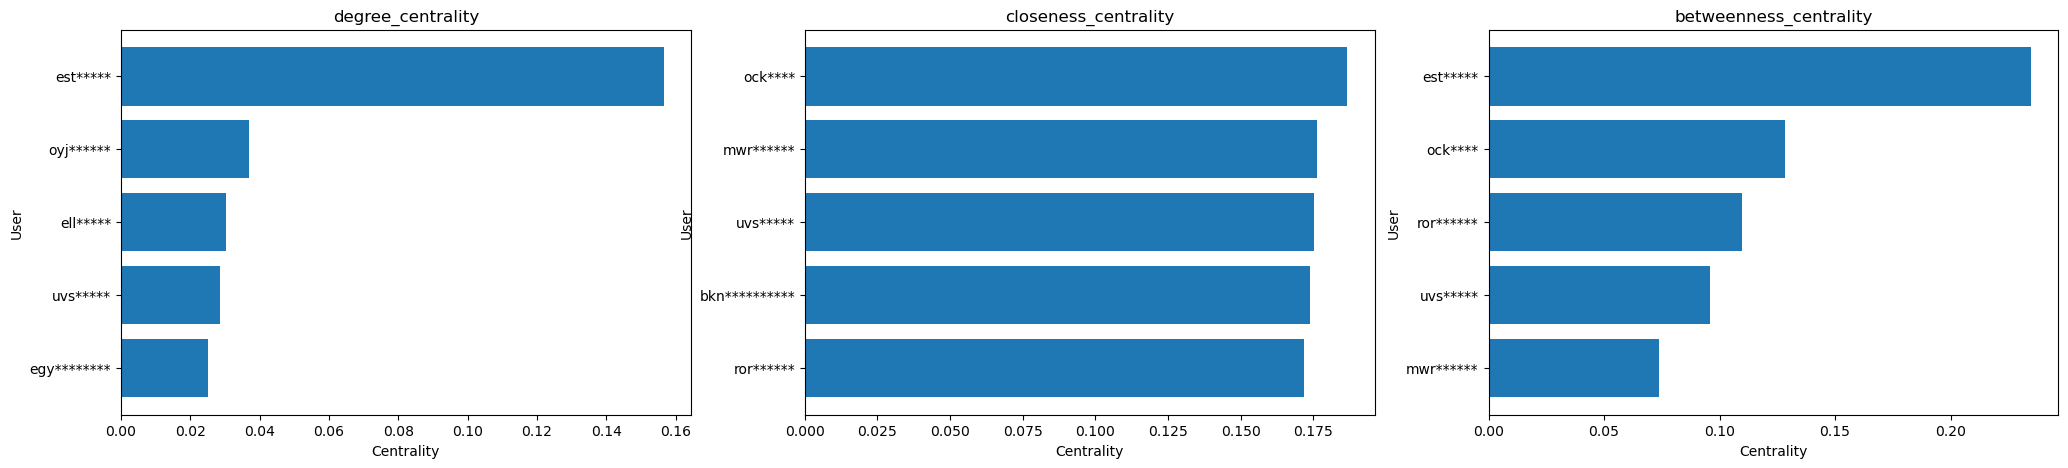

In [28]:
# Menampilkan visualisasi bar plot degree centrality, closeness centrality, dan betweenness centrality
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

centrality = [degree_centrality, closeness_centrality, betweenness_centrality]

for i, centrality in enumerate(centrality):
    centrality = centrality.head(5)
    ax[i].barh(centrality['user'], centrality.iloc[:, 1])
    ax[i].set_title(centrality.columns[1])
    ax[i].invert_yaxis()
    ax[i].set_xlabel('Centrality')
    ax[i].set_ylabel('User')

plt.show()

Jika kita lihat berdasarkan grafik diatas, user dengan nama "est*" memiliki degree centrality tertinggi, yang berarti user ini memiliki jumlah koneksi terbanyak dalam jaringan. Hal ini bisa saja terjadi jika pengguna tersebut sangat aktif di Twitter, sering berinteraksi dengan pengguna lain. Dan juga memiliki betweenness centrality tertinggi, yang berarti user ini memainkan peran penting dalam menghubungkan pengguna lain dalam jaringan. Dia mungkin sering menjadi perantara atau menghubungkan komunitas yang berbeda dalam jaringan. Sedangkan Pengguna "ock*" memiliki closeness centrality tertinggi. Ini menunjukkan bahwa pengguna ini memiliki jarak yang lebih dekat ke pengguna lain dalam jaringan, artinya dia dapat mencapai pengguna lain dengan cepat. Ini bisa disebabkan oleh fakta bahwa pengguna "ock****" mungkin memiliki hubungan yang sangat erat dengan sejumlah pengguna kunci dalam jaringan, yang memungkinkannya untuk dengan cepat menjangkau pengguna lain.



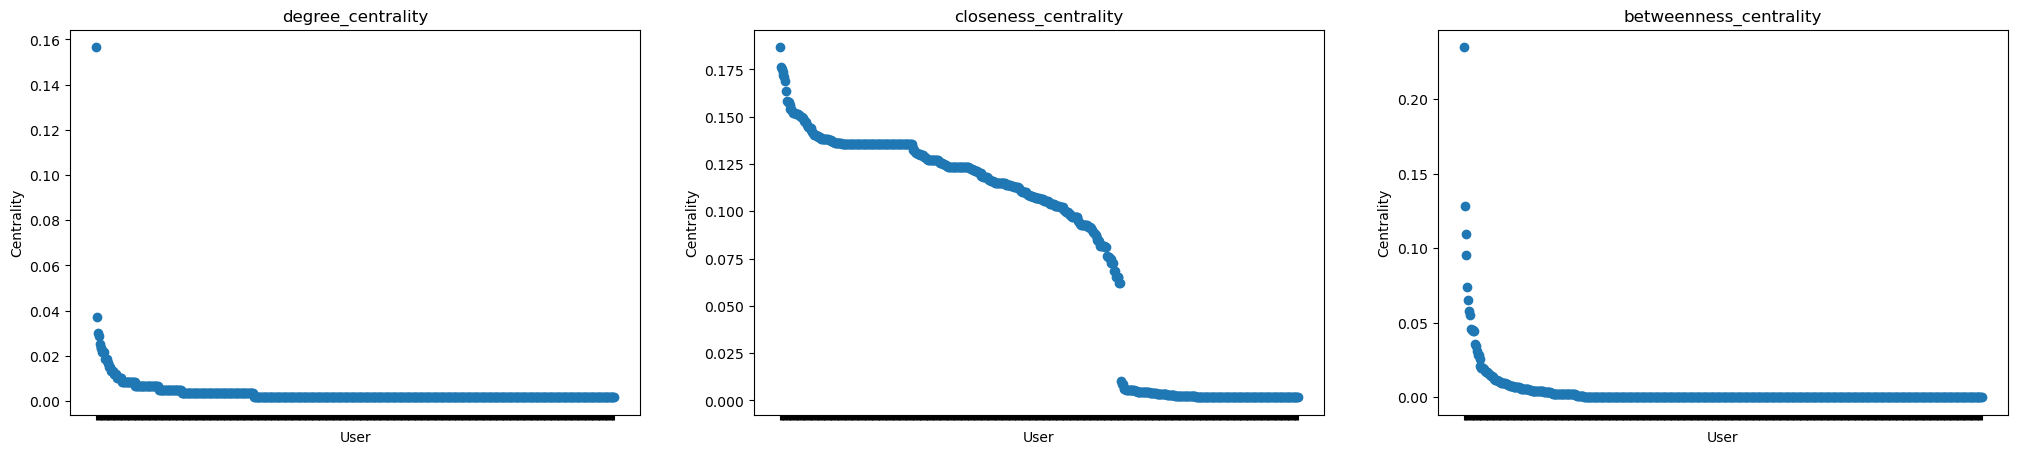

In [29]:
# Menampilkan visualisasi scatter plot degree centrality, closeness centrality, dan betweenness centrality
fig, ax = plt.subplots(1, 3, figsize=(25, 5))

centrality = [degree_centrality, closeness_centrality, betweenness_centrality]

for i, centrality in enumerate(centrality):
    ax[i].scatter(centrality['user'], centrality.iloc[:, 1])
    ax[i].set_title(centrality.columns[1])
    ax[i].set_xticklabels([])
    ax[i].set_xlabel('User')
    ax[i].set_ylabel('Centrality')

plt.show()

Berikut adalah analisis grafik dari setiap centrality:

- **Degree centrality**: Grafik ini menunjukkan jumlah hubungan yang dimiliki setiap user dengan user lain. User dengan degree centrality tinggi berarti memiliki banyak hubungan, sedangkan user dengan degree centrality rendah berarti memiliki sedikit hubungan.
- **Closeness centrality**: Grafik ini menunjukkan seberapa dekat setiap user dengan user lain dalam jaringan. User dengan closeness centrality tinggi berarti memiliki jarak yang kecil dengan user lain, sedangkan user dengan closeness centrality rendah berarti memiliki jarak yang besar dengan user lain.
- **Betweenness centrality**: Grafik ini menunjukkan seberapa sering setiap user berperan sebagai perantara atau penghubung antara user lain dalam jaringan. User dengan betweenness centrality tinggi berarti memiliki peran yang penting dalam menghubungkan user lain, sedangkan user dengan betweenness centrality rendah berarti memiliki peran yang kurang penting dalam menghubungkan user lain.